### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2021 Semester 2

## Week 3 - Visualisation

### The Structure of matplotlib

The `matplotlib` is conceptually divided into three parts. The first part, matplotlib API, is the library that does the hard-work, managing and creating figures, text, lines, plots and so on. In the code above, we access this library by issuing the following command:

    >>> import matplotlib

The device dependent backend is the second part. It is the drawing engine that is responsible to render the visual representation to a file or a display device. Example of backends: 'PS' backend is used to create postscript file (suitable for hardcopy printout), 'SVG' creates scalar vector graphics (SVG file), 'Tkinter' on Windows provides interactive interface to the visualization. E.g. One can use the Agg backend to produce a PNG file, as displayed the example above:

     >>> matplotlib.use('Agg')

The `pyplot` interface is the last part of the matplotlib package. Module `pyplot` provides a set of functions that utilize the underlying matplotlib library. High level visualization functions like plot, boxplot, and bar, are available through pylab interface. To import these functions, issue the following command:

    >>> import matplotlib.pyplot as plt
    

In [14]:
import matplotlib.pyplot as plt

### The Dataset
Today, we will be working with a slightly modified version of the (very famous) Iris dataset, first
discussed in:

\begin{align}
{Fisher, R.A. (1936) The Use of Multiple Measurements in Taxonomic Problems, Annual Eugenics
7(II), pp. 179–188.}
\end{align}

This dataset (along with many others) is freely downloadable from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Iris). It also comes bundled with scikit-learn,
but we will not be using that version today. 

The dataset and images, along with some of the problems in this worksheet have been adapted from work by Randal Olson (http://www.randalolson.com/) which we use under its Creative Commons license (https://creativecommons.org/licenses/by/4.0/).

Before we start doing anything, let’s frame our problem:
- Let’s say that we would like to build a system that can automatically predict the species of a flower, based on a photograph of that flower.
- The data that we have collected at this point is a description of three kinds of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. (In the future, we hope to examine other species/genera of flowers.) We believe that the sepals and petals represent one possible source of useful information to help us solve this problem.
- The data was collected by field researchers measuring certain properties of the sepals and petals on a sample of the three kinds of flower. (If some of this information proves useful, then we plan on incorporating image–processing software so that this can be discerned automatically.)

In [15]:
import pandas as pd

## plot()
`Plot` is probably the most important function in matplotlib. 
`Plot` draws lines and/or markers using coordinates from the multiple points or x,y 
pairs supplied in the argument of the function. 
Both x and y are generally list or array of values. 

For example, the following command plots a simple quadratic function `y = x * x`.

    >>> x = [1,2,3,4]
    >>> y = [1,4,9,16]
    >>> plt.plot(x,y)

**Note:** A single list argument to the plot command, like `plot(y)`, would be considered as a list of y-values. `matplotlib` automatically generates the x-values for you.

**Note:** In shell script mode, everytime you issue `plot()` command, the output is added to the results of the earlier `plot()`. The `clf()` function can be called to empty the canvas. 



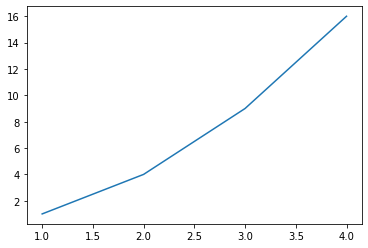

In [16]:
x = [1,2,3,4]
y = [1,4,9,16]
plt.plot(x,y)


### Step 1
Begin by visually inspecting the raw data contained within the (textual) file `iris-data.csv`. Note that “inspecting the data” is mostly ineffectual for very large datasets. In fact, this is one of the main motivators for Machine Learning! :-)

- How many instances are there? How many attributes? The instances have been labelled with class information—so this dataset is suitable for **supervised** machine learning — how many classes are there?

In [17]:
#class_dict = pd.Series()

class_dict = pd.read_csv('iris-data.csv')

print('Our total number of instances is:',class_dict.size)

print(class_dict.groupby('class').size())


Our total number of instances is: 750
class
Iris-setosa        49
Iris-setossa        1
Iris-versicolor    45
Iris-virginica     50
versicolor          5
dtype: int64


- You should notice a couple of problems with the class labels; make a copy of the CSV file called `iris-clean.csv`, and edit the erroneous class labels with their (likely) correct values.

`It looks like "setosa" was misspelled for one instance, and a few instances use the short-form "versicolor" instead of the standard "Iris-versicolor". So we first "clean" the data and then check the file again.`

In [18]:
class_dict.loc[class_dict['class'] == 'versicolor','class'] = 'Iris-versicolor'
class_dict.loc[class_dict['class'] == 'Iris-setossa','class'] = 'Iris-setosa'
class_dict.to_csv('iris-clean.csv')

In [19]:
clean_data = pd.read_csv('iris-clean.csv')

print(clean_data.groupby('class').size())


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Step 2
Before we can think about building a classifier, we should double–check that the data is formatted **correctly**. Confirm that the first line of the dataset is a header, which describes the expected format.

**(a)** Check if we have any `null` values in the dataset. 

In [20]:
clean_data[clean_data.isna().any(axis=1)]

,Unnamed: 0,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,7,5.0,3.4,1.5,NaN,Iris-setosa
8,8,4.4,2.9,1.4,NaN,Iris-setosa
9,9,4.9,3.1,1.5,NaN,Iris-setosa
10,10,5.4,3.7,1.5,NaN,Iris-setosa
11,11,4.8,3.4,1.6,NaN,Iris-setosa


`It looks like we have some missing values in the column 'petal_width_cm'.`

There are multiple approaches to deal with 'missing values'. One possible opproach can be removing (dropping) the whole row. 

    >> clean_data.dropna(inplace = True)

Another method can be replacing the 'missing value' with the **mean of the observed values** for that attribute.

    >> clean_data['petal_width_cm'].fillna(clean_data['petal_width_cm'].mean(), inplace = True)

To check if it an appropriate method for our data. We can use the `matplotlib` library to plot a histogram for the data as follows:

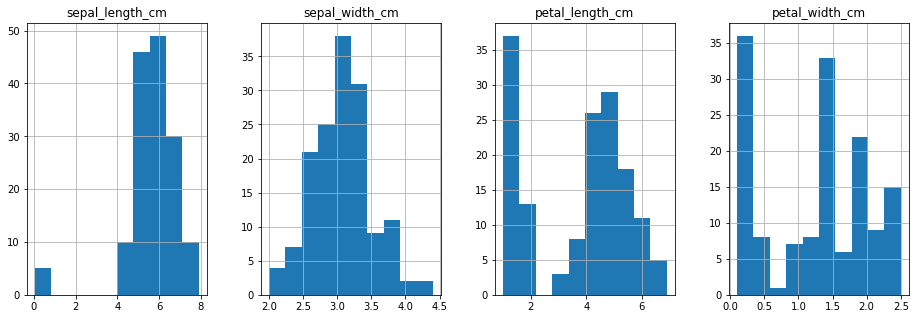

In [21]:
ax = clean_data.hist(column=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'],layout=(1,5), figsize= (20,5))

**(c)** Explian why using the **mean of the observed values** is a bad idea for the feature 4 ('Petal Widths'), based on the data you observe

Unlike, say, sepal widths (that has a roghly normal distrubution), the mean value of the petal width distribution (our forth attribute with missing values) doesn't appear to be representative of much of the data.` 

Based on these bins, the mean isn't even the mode! One possible reason for this is that different classes of Iris might have a different mean petal width: for example, there appear to be roughly three peaks in this distribution (one around 0.3, one around 1.3, and one around 2.0), and three classes. 

<blockquote style="padding: 10px; background-color: #FFD392;">

## Exercise
Based on the data you observe, explain if there is anything we can do, to make mean imputation a plausible strategy here?

your explanation here
.
.
.



In [22]:
# your code here


### Step 3
Use the method above to plot the histograms for the other attributes. You should observe some clear **outliers** in the attribute values. Take a look at the raw data, and see if you can guess what could have caused the outliers. Modify your `iris-clean.csv` copy of the data, to fix the outlying attribute values.

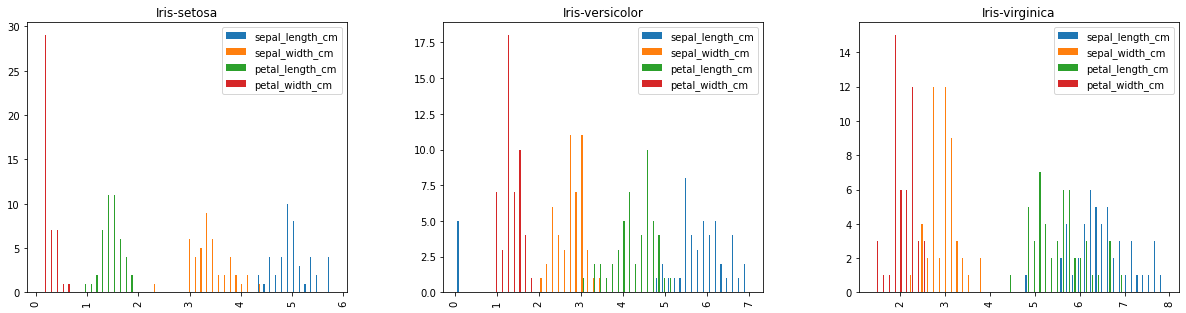

In [23]:
ax = clean_data.hist(column = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'],by= 'class',bins=50, layout=(1,3), figsize= (20,5), legend = 'true')

Most of the sepal lengths of all three kinds of Iris are between 4cm and 8cm, however, there are a small number of Iris-versicolor instances for which the sepal lengths are less than 1cm, which looks a little strange. Let's take a look at them, compared to a sample of the rest of the data:

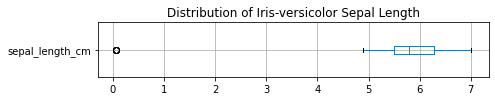

In [24]:
versi_color_data = clean_data[clean_data['class']=='Iris-versicolor']

fig, ax = plt.subplots(figsize=(7, 1))
versi_color_data.boxplot(column='sepal_length_cm', vert=False, ax=ax)
ax.set_title('Distribution of Iris-versicolor Sepal Length')
plt.show()

In [25]:
print("Short sepal lengths:")
print(len(clean_data[clean_data['sepal_length_cm']<1].index))

print("Some regular sepal lengths:")
print(len(clean_data[clean_data['sepal_length_cm']>=1].index))

Short sepal lengths:
5
Some regular sepal lengths:
145


Looking at the data, the smaller values have the same number of significant digits, but are smaller by two orders of magnitude. One possible explanation is that this information was being recorded in m instead of cm on some instances (perhaps because there were multiple people who were doing the data collection, or the software parameters changed, or various other possiblew reasons).

We would want to double-check this with the data curators; are these values actually correct, or are they erroneous, and therefore should we attempt to fix them? Let's say that we did discover that these are truly erroneous readings, and that we should multiply them by a factor of 100.

<blockquote style="padding: 10px; background-color: #FFD392;">

## Exercise
Write a piece of code that multiple the erroneous sepal lengths by 100.

In [26]:
#Your code here

### Step 4
Let’s attempt to visualise some relationships in the data.

First let's make a scatter-plot of the sepal length vs. sepal width by using the following:

<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

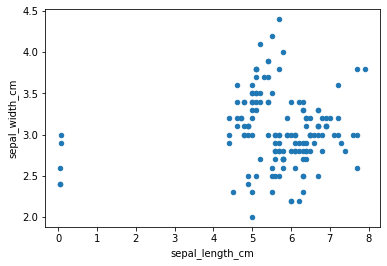

In [27]:
clean_data.plot.scatter(x='sepal_length_cm', y='sepal_width_cm')

**Can you identify a certain pattern in it?**

It is suggestive, but without a clear indication of the classes of the instances, we can’t really be certain of any patterns in the data.

The scatter function takes an optional argument for colouring points, based on a list of strings (like red or blue). Let's replot our data using different colours for different classes.

In [28]:
#replace class names with integers
for i,c in zip([1,2,3],['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']):
    clean_data.loc[clean_data[clean_data['class'] == c].index,['class']] = i

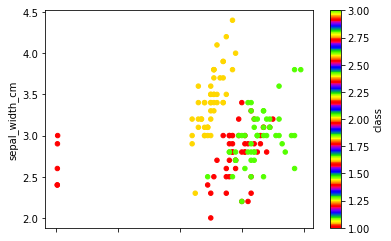

In [29]:
ax = clean_data.plot.scatter(x='sepal_length_cm', y='sepal_width_cm', c='class', colormap='prism')

Or we can develop it using the 'matplotlib'

Text(0.5, 1.0, 'Sepal Length vs Petal Width')

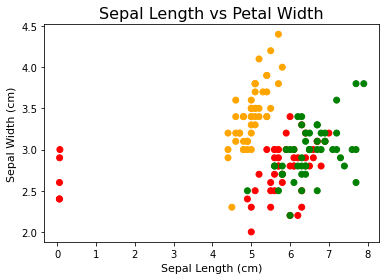

In [30]:
clean_data = pd.read_csv('iris-clean.csv')

my_colors = {'Iris-versicolor' : 'red', 'Iris-setosa' : 'orange', 'Iris-virginica' : 'green'}
plt.scatter(x = clean_data['sepal_length_cm'], y = clean_data['sepal_width_cm'], c = clean_data['class'].map(my_colors))
plt.xlabel('Sepal Length (cm)', fontsize=11)
plt.ylabel('Sepal Width (cm)', fontsize=11)
plt.title('Sepal Length vs Petal Width', fontsize=16)

**Now can you identify a certain pattern?**

At a casual glance, it appears that most of the Iris-setosa instances (red dots) occupy a distinct "region" of this space (relatively short sepal length, but relatively high sepal width), but for the other two classes, the points are somewhat "mixed up".

**Now let's try making scatter-plots for different pairs of attributes.**

Text(0.5, 1.0, 'Sepal Length vs Petal Length')

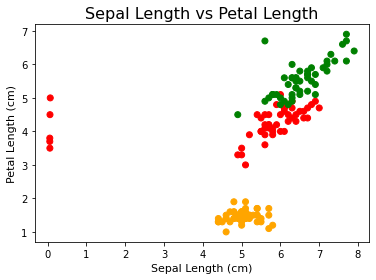

In [31]:
plt.scatter(x = clean_data['sepal_length_cm'], y = clean_data['petal_length_cm'], c = clean_data['class'].map(my_colors))
plt.xlabel('Sepal Length (cm)', fontsize=11)
plt.ylabel('Petal Length (cm)', fontsize=11)
plt.title('Sepal Length vs Petal Length', fontsize=16)

Text(0.5, 1.0, 'Sepal Length vs Petal Width')

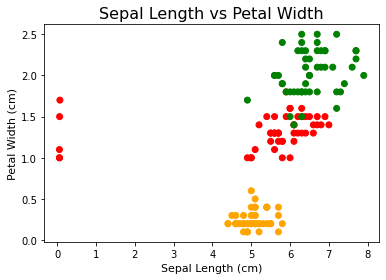

In [32]:
plt.scatter(x = clean_data['sepal_length_cm'], y = clean_data['petal_width_cm'], c = clean_data['class'].map(my_colors))
plt.xlabel('Sepal Length (cm)', fontsize=11)
plt.ylabel('Petal Width (cm)', fontsize=11)
plt.title('Sepal Length vs Petal Width', fontsize=16)

Text(0.5, 1.0, 'Sepal Width vs Petal Length')

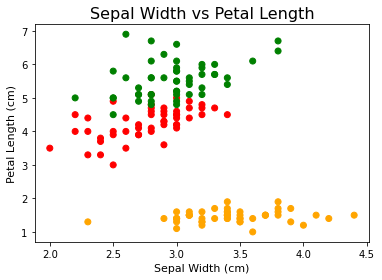

In [33]:
plt.scatter(x = clean_data['sepal_width_cm'], y = clean_data['petal_length_cm'], c = clean_data['class'].map(my_colors))
plt.xlabel('Sepal Width (cm)', fontsize=11)
plt.ylabel('Petal Length (cm)', fontsize=11)
plt.title('Sepal Width vs Petal Length', fontsize=16)

Text(0.5, 1.0, 'Sepal Width vs Petal Width')

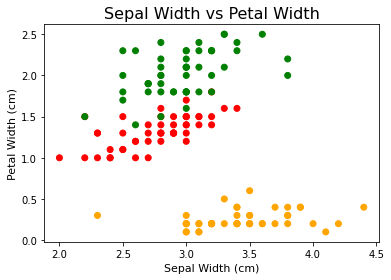

In [34]:
plt.scatter(x = clean_data['sepal_width_cm'], y = clean_data['petal_width_cm'], c = clean_data['class'].map(my_colors))
plt.xlabel('Sepal Width (cm)', fontsize=11)
plt.ylabel('Petal Width (cm)', fontsize=11)
plt.title('Sepal Width vs Petal Width', fontsize=16)

Text(0.5, 1.0, 'Sepal Length vs Petal Width')

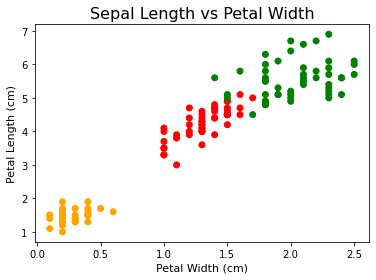

In [35]:
plt.scatter(x = clean_data['petal_width_cm'], y = clean_data['petal_length_cm'], c = clean_data['class'].map(my_colors))
plt.xlabel('Petal Width (cm)', fontsize=11)
plt.ylabel('Petal Length (cm)', fontsize=11)
plt.title('Sepal Length vs Petal Width', fontsize=16)

<blockquote style="padding: 10px; background-color: #FFD392;">

## Exercise
Do you notice anything that might suggest that one class is distinguishable from the others? How might this information be utilised by the Naive Bayes algorithm? What about other supervised machine learning methods?

## Challenge questions

1. What are Heatmaps? When do we use them? Develope a heatmap for the IRIS dataset.
2. Develop a heatmat using the 'seaborn' package.
3. What are Parallel co-ordinate plots? When do we use them?